In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv",encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


**FEATURE SELECTION**:- We don't need customer name, customer e-mail and country for sales price prediction. So, we will drop these 3 columns

In [3]:
df.drop(columns = ['customer name', 'customer e-mail', 'country'], inplace = True)
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


**OUTLIER ANALYSIS BY PLOTTING BOXPLOTS**

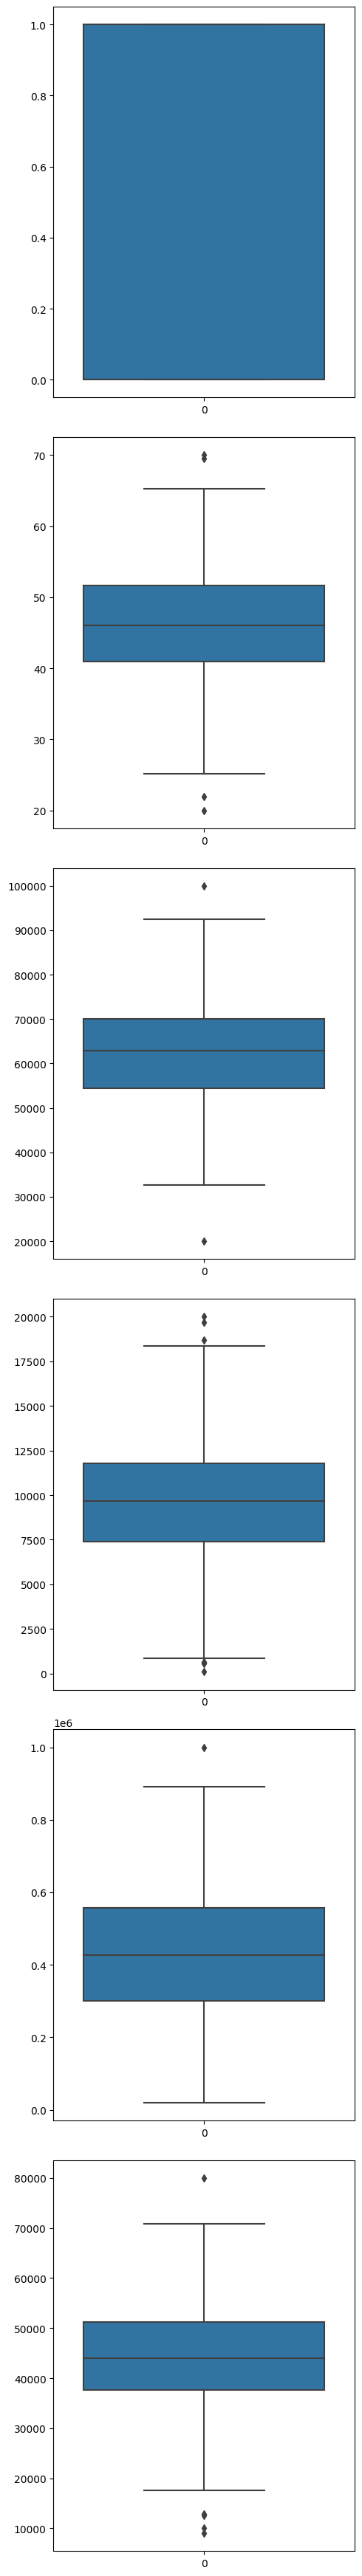

In [5]:
import seaborn as sns

fig, axs = plt.subplots(6, figsize = (5,35))
plt1 = sns.boxplot(df['gender'], ax = axs[0])
plt2 = sns.boxplot(df['age'], ax = axs[1])
plt3 = sns.boxplot(df['annual Salary'], ax = axs[2])
plt3 = sns.boxplot(df['credit card debt'], ax = axs[3])
plt3 = sns.boxplot(df['net worth'], ax = axs[4])
plt3 = sns.boxplot(df['car purchase amount'], ax = axs[5])
plt.tight_layout()

CLEANING DATA BY USING IQR METHOD

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold (e.g., 1.5 times the IQR)
threshold = 1.5

# Create a boolean mask to identify outliers
outlier_mask = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

# Filter the dataset to remove outliers
filtered_dataset = df[~outlier_mask]

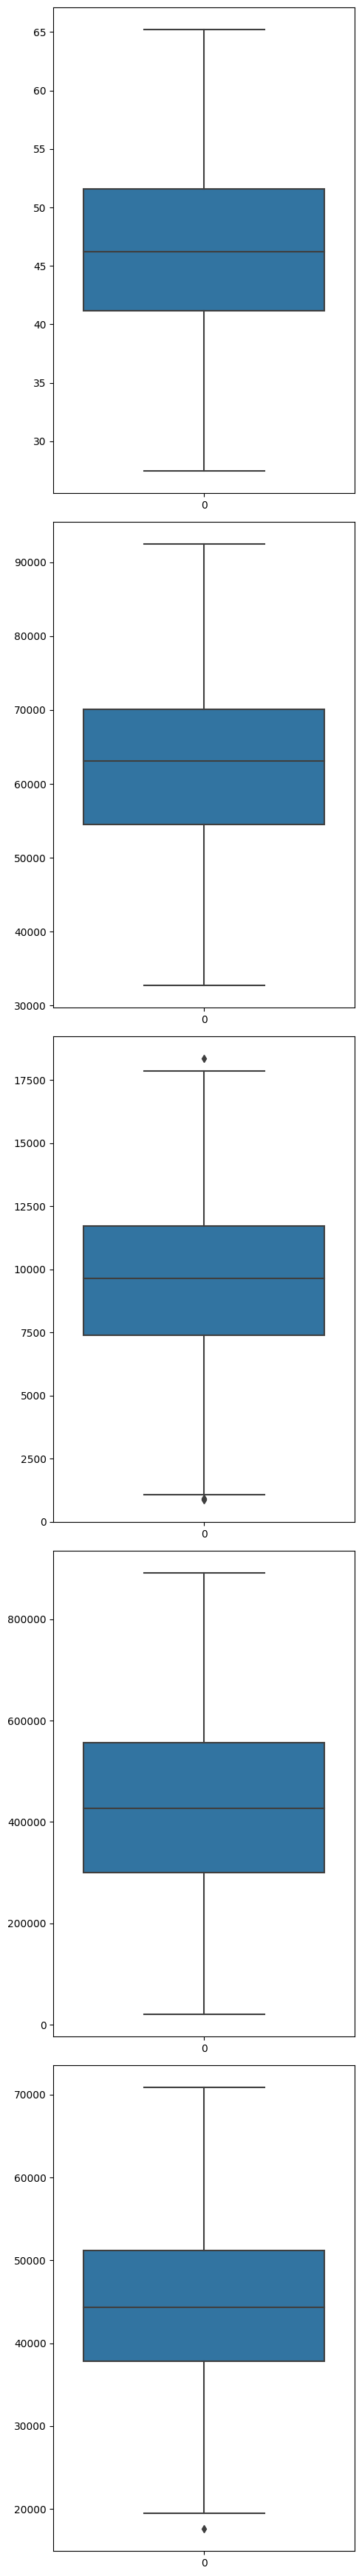

In [8]:
# Outlier Analysis
import seaborn as sns

fig, axs = plt.subplots(5, figsize = (5,35))
plt2 = sns.boxplot(filtered_dataset['age'], ax = axs[0])
plt3 = sns.boxplot(filtered_dataset['annual Salary'], ax = axs[1])
plt3 = sns.boxplot(filtered_dataset['credit card debt'], ax = axs[2])
plt3 = sns.boxplot(filtered_dataset['net worth'], ax = axs[3])
plt3 = sns.boxplot(filtered_dataset['car purchase amount'], ax = axs[4])
plt.tight_layout()

In [9]:
X = filtered_dataset.drop ("car purchase amount", axis = 1)
X.head()

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [10]:
y = filtered_dataset['car purchase amount']
y.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: car purchase amount, dtype: float64

**SCALING DATA**

In [11]:
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)
y = Scaler.fit_transform(y.values.reshape(-1,1))

**SPLIT DATA INTO TRANING AND TEST SETS**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(388, 5)
(97, 5)
(388, 1)
(97, 1)


In [14]:
import numpy as np


beta = np.zeros(6)
number_of_iterations = 1000
learning_rate = 0.01
n = len(X_train)  # Number of training examples

for i in range(number_of_iterations):
    # Initialize gradient values for each feature
    x0_gradient = 0
    x1_gradient = 0
    x2_gradient = 0
    x3_gradient = 0
    x4_gradient = 0
    x5_gradient = 0

    for j in range(n):
        # Extract features and target for the j-th training example
        a = X_train[j, 0]
        b = X_train[j, 1]
        c = X_train[j, 2]
        d = X_train[j, 3]
        e = X_train[j, 4]
        f = y_train[j]

        # Calculate gradients for each feature
        prediction = (beta[0] + (beta[1] * a) + (beta[2] * b) + (beta[3] * c) + (beta[4] * d) + (beta[5] * e))
        error = prediction - f
        x0_gradient += error
        x1_gradient += error * a
        x2_gradient += error * b
        x3_gradient += error * c
        x4_gradient += error * d
        x5_gradient += error * e

    # Update beta values using the gradients
    beta[0] = beta[0] - learning_rate * (1/n) * x0_gradient
    beta[1] = beta[1] - learning_rate * (1/n) * x1_gradient
    beta[2] = beta[2] - learning_rate * (1/n) * x2_gradient
    beta[3] = beta[3] - learning_rate * (1/n) * x3_gradient
    beta[4] = beta[4] - learning_rate * (1/n) * x4_gradient
    beta[5] = beta[5] - learning_rate * (1/n) * x5_gradient

    print(beta)


[0.00506669 0.00244311 0.0027894  0.00277158 0.0025593  0.00256512]
[0.01001781 0.00482313 0.0055196  0.00548435 0.00505951 0.00507508]
[0.014856   0.00714151 0.00819193 0.00813966 0.00750198 0.00753113]
[0.01958379 0.00939967 0.0108077  0.01073879 0.00988801 0.0099345 ]
[0.0242037  0.01159898 0.01336819 0.01328301 0.01221887 0.01228636]
[0.02871816 0.01374081 0.01587465 0.01577357 0.01449583 0.01458788]
[0.03312956 0.01582646 0.0183283  0.01821169 0.01672009 0.01684021]
[0.03744023 0.01785723 0.02073033 0.02059853 0.01889286 0.01904446]
[0.04165246 0.01983439 0.02308191 0.02293527 0.02101529 0.0212017 ]
[0.04576846 0.02175917 0.02538418 0.02522303 0.02308853 0.02331301]
[0.04979042 0.02363276 0.02763825 0.02746292 0.02511369 0.02537942]
[0.05372047 0.02545635 0.02984522 0.02965603 0.02709186 0.02740195]
[0.05756068 0.02723109 0.03200614 0.0318034  0.0290241  0.02938159]
[0.06131309 0.02895811 0.03412206 0.03390608 0.03091146 0.03131931]
[0.06497968 0.0306385  0.03619398 0.03596506 0.0

In [15]:
X_test=np.insert(X_test,0,values=1,axis=1)#adding column with 1 value
beta=np.array(beta).reshape(-1,1)
y_predict=X_test.dot(beta)


In [19]:
print(y_predict[:5]) 

[[0.57546195]
 [0.52848745]
 [0.55550701]
 [0.55924738]
 [0.65087198]]


In [25]:
print(y_predict.shape)

(97, 1)


In [22]:
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print('mean square error= ',mean_square_error)
rms_error=np.sqrt(mean_square_error)
print('rms error= ',rms_error)
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
print('R2 score= ',1-sum_square_error/total_variance)

mean square error=  0.01220111724268095
rms error=  0.11045866757607095
R2 score=  0.6409509976186325


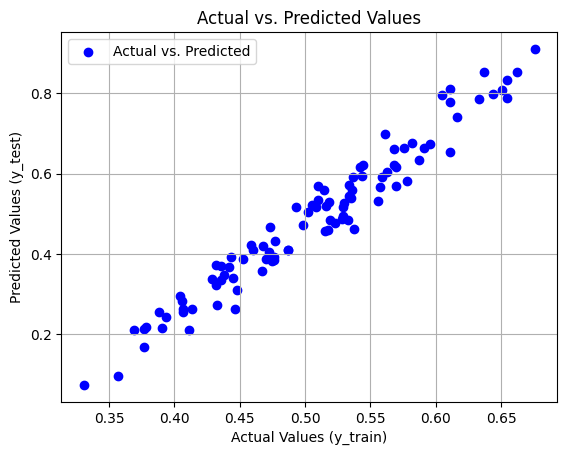

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_predict, y_test, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_test)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
